# Some maybe usefull stuff:
- Lets keep all the question to Antonio to trello
- The code to mark text: $**<code style="background:yellow;color:blue"> text</code>**$

In [381]:
# pip install -U imbalanced-learn

In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import streamlit as st
import os

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier


In [383]:
#Getting the data

raw_data = pd.read_csv(r"C:\Users\katar\OneDrive\Dokumenty\Edukacja\Data Science\6_DS_Project\Project\03_Coding\Cards_data\creditcard.csv")

#raw_data = pd.read_csv(r"D:\06_projekt_i_data_science\coding ground\raw data\onlinefraud.csv")

In [384]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [385]:
raw_data['Class'] 

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [386]:
raw_data.shape

(284807, 31)

### Spliting the data into training, validation and test set


In [387]:
# spliting the data after preprocesing
raw_train, raw_valid_test = train_test_split(raw_data, test_size=0.4, random_state = 42, shuffle=True, stratify=raw_data["Class"])

In [388]:
raw_val, raw_test = train_test_split(raw_valid_test, test_size=0.5, random_state = 42, shuffle=True, stratify=raw_valid_test["Class"])

y_train = raw_train['Class']
y_test = raw_test['Class']
y_val = raw_val['Class']

In [389]:
print("Training set dimensions: ", raw_train.shape, 'amd training lagels:', y_train.shape,)
print("Test set dimensions: ", raw_test.shape, 'and test labels:', y_test.shape)
print("Validation dataset dimensions: ", raw_val.shape, 'and validation labels:', y_val.shape)

Training set dimensions:  (170884, 31) amd training lagels: (170884,)
Test set dimensions:  (56962, 31) and test labels: (56962,)
Validation dataset dimensions:  (56961, 31) and validation labels: (56961,)


# ---------EDA-------------


In [390]:
raw_train.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
109011,71174.000,-2.108,1.173,1.614,0.483,0.067,-0.191,0.191,-1.706,-0.178,...,1.521,-0.389,0.260,0.341,0.400,-0.413,-0.348,0.215,19.990,0
280683,169683.000,2.314,-1.311,-1.421,-1.724,-1.003,-0.913,-0.899,-0.222,-1.658,...,0.089,0.665,0.029,-0.348,0.069,0.074,-0.024,-0.076,15.000,0
158318,111127.000,2.105,0.155,-1.403,0.311,0.504,-0.691,0.139,-0.418,1.895,...,0.108,0.760,-0.022,0.465,0.403,-0.479,-0.017,-0.054,1.000,0
243733,152052.000,2.072,-0.016,-1.311,0.373,-0.063,-1.381,0.244,-0.394,0.631,...,0.243,0.858,0.003,0.077,0.259,-0.110,-0.021,-0.059,1.990,0
177016,123008.000,2.046,0.156,-2.007,0.385,0.604,-0.757,0.232,-0.231,0.072,...,0.327,1.166,-0.109,0.794,0.377,0.838,-0.075,-0.053,1.570,0
76252,56476.000,1.210,0.005,0.665,0.847,-0.684,-0.654,-0.132,-0.075,0.590,...,-0.299,-0.729,0.077,0.404,0.321,0.181,-0.019,0.017,12.950,0
120209,75747.000,-0.797,-0.556,1.468,-2.465,0.185,-1.288,-0.120,-0.187,-2.779,...,-0.503,-1.353,-0.060,-0.193,0.351,-0.582,0.009,0.066,0.900,0
195576,131128.000,-0.360,0.503,-1.280,-0.112,-0.167,-0.597,1.216,0.266,-0.398,...,0.490,0.946,0.337,-0.460,-0.279,-0.156,-0.090,0.039,224.600,0
193050,129971.000,-2.246,-1.757,1.385,-0.281,1.430,1.214,0.020,0.663,-0.159,...,0.597,0.931,0.447,-1.645,0.611,0.065,-0.031,0.092,284.590,0
144159,85901.000,-2.749,2.126,0.935,-0.069,-1.526,-0.426,-0.644,1.423,-0.184,...,0.006,-0.093,-0.008,0.404,0.227,0.279,0.126,0.118,36.960,0


In [391]:
# All the amounts are zero or positive
print(f'Is any amount 0? --> {any(raw_train.Amount== 0)}')
print(f'Are all amounts bigger than or equal to 0? --> {all(raw_train.Amount>= 0)}')

Is any amount 0? --> True
Are all amounts bigger than or equal to 0? --> True


In [392]:
raw_train.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170884 entries, 109011 to 17677
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21   

### Numeric data

In [393]:
raw_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,...,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000
mean,94939.37288,0.00197,-0.00445,-0.00249,0.00011,0.00041,-0.00079,-0.00178,-0.00014,0.00331,...,0.00140,0.00034,0.00064,0.00026,-0.00090,0.00025,-0.00050,0.00012,88.42941,0.00173
std,47506.71221,1.95921,1.65161,1.51925,1.41495,1.38177,1.33247,1.24667,1.19175,1.09781,...,0.73926,0.72656,0.62725,0.60509,0.52206,0.48256,0.40685,0.31471,255.43632,0.04151
min,0.00000,-46.85505,-63.34470,-48.32559,-5.68317,-113.74331,-21.92931,-43.55724,-73.21672,-13.43407,...,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
25%,54277.75000,-0.91788,-0.60133,-0.89262,-0.84617,-0.69185,-0.76804,-0.55509,-0.20791,-0.63949,...,-0.22780,-0.54198,-0.16219,-0.35470,-0.31706,-0.32719,-0.07069,-0.05296,5.74000,0.00000
50%,84907.50000,0.02251,0.06266,0.17883,-0.02059,-0.05647,-0.27367,0.03973,0.02256,-0.04798,...,-0.02868,0.00674,-0.01065,0.04137,0.01640,-0.05211,0.00122,0.01116,22.05000,0.00000
75%,139422.25000,1.31587,0.80114,1.02332,0.74360,0.61078,0.39721,0.57156,0.32606,0.60140,...,0.18644,0.52834,0.14776,0.43952,0.34958,0.24210,0.09084,0.07782,77.50000,0.00000
max,172792.00000,2.45189,22.05773,9.38256,16.87534,32.91146,73.30163,120.58949,20.00721,15.59499,...,27.20284,10.50309,22.08354,4.58455,6.07085,3.51735,31.61220,15.87047,25691.16000,1.00000


### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- the dataset consists of 284 807 transactions and 32 columns
- $Class$ is the target value
- there are no missig values
- Only numerical variables are present


In [394]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

detect_outliers(raw_train)

,Outlier_percentage
V27,13.793
Amount,11.171
V28,10.768
V20,9.829
V8,8.406
V6,8.043
V23,6.510
V12,5.349
V21,5.077
V14,5.006


In [395]:
raw_train.Class.value_counts(normalize=True)

0   0.998
1   0.002
Name: Class, dtype: float64

In [396]:
raw_train.Class.value_counts(normalize=False)

0    170589
1       295
Name: Class, dtype: int64

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- there is much more not fraud cases -> we will need to check closer the accuracy metrics for the fraud class. 

Only by predicting all transactions as non fraud -> the accuracy will be over 0,99!\
Suitable metrics: __Precision, Recall, F1 score, ROC AUC score__



In [397]:
raw_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

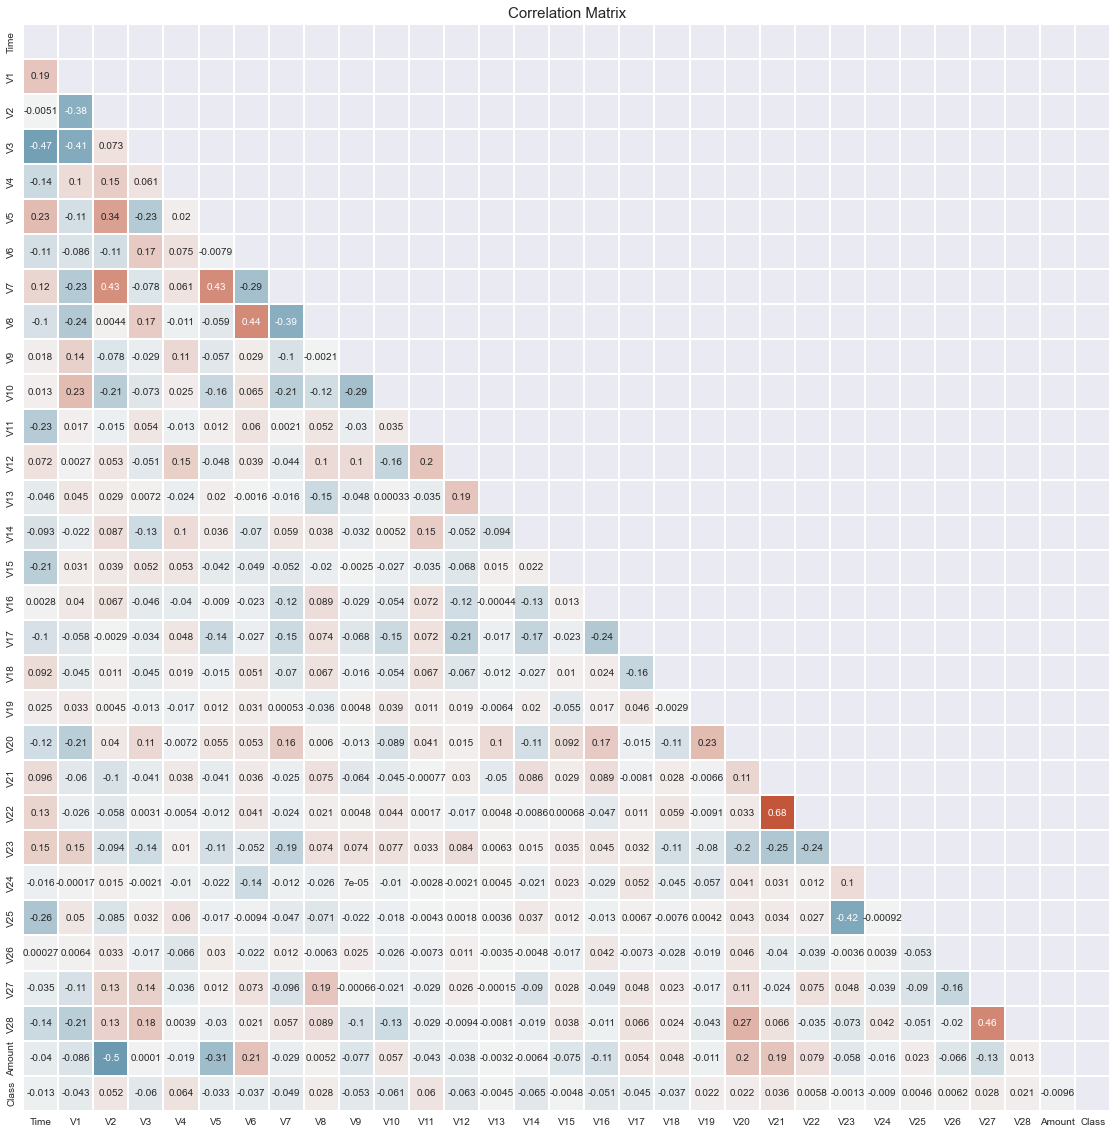

In [398]:
features = [
    'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
    'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
    'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
    'Class'
]

correlation_matrix = raw_train[features].corr(method="spearman") # pearson / spearman

#from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Correlation Matrix", fontsize=15)

Note:
The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.

In [399]:
corr_values=raw_train.corr()['Class']

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- 

### Only the fraudulent transactions

In [400]:
df_fraud = raw_train[raw_train['Class'] == 1]
len(df_fraud)

295

In [401]:
df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
84543,60353.000,-3.975,0.582,-1.880,4.319,-3.024,1.241,-1.910,0.661,-2.753,...,0.579,1.397,1.045,-0.304,0.005,0.235,0.962,-0.674,454.820,1
9509,14152.000,-4.711,8.636,-15.496,10.313,-4.351,-3.323,-10.788,5.060,-5.689,...,1.991,0.224,0.554,-1.204,-0.451,0.642,1.606,0.722,1.000,1
276071,166883.000,2.092,-0.757,-1.192,-0.755,-0.620,-0.322,-1.083,0.117,-0.141,...,0.288,0.832,0.142,0.593,-0.196,-0.137,0.020,-0.015,19.950,1
262560,160537.000,0.568,3.309,-6.631,6.395,-0.054,-2.397,-2.792,0.515,-3.542,...,0.614,-0.365,-0.180,-0.523,0.645,0.246,0.903,0.474,4.690,1
50211,44393.000,-4.617,3.663,-5.297,3.881,-3.264,-0.919,-5.715,0.831,-2.457,...,2.698,-0.027,0.367,-0.123,-0.300,-0.240,-0.183,-0.073,1.000,1


### Violinplot of the distribution of the fraudulent amounts

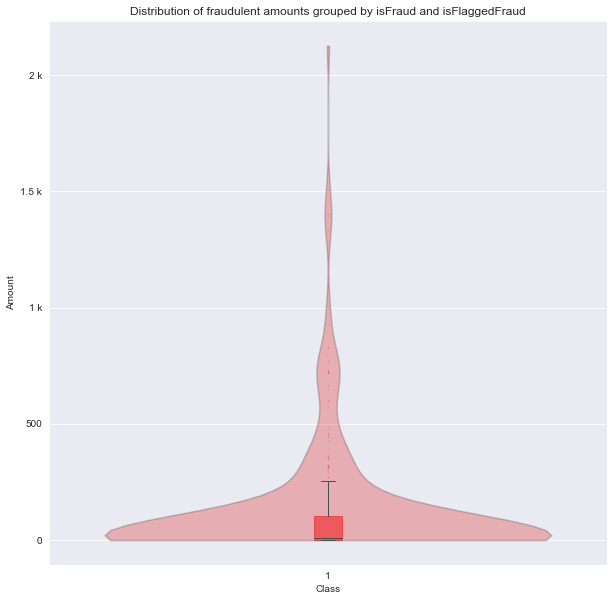

In [402]:
import matplotlib.ticker as ticker
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(10,10))

# fraud
# sns.violinplot(data=df_fraud, y='amount', x='isFraud', ax=ax, color='red')
sns.violinplot(data=df_fraud, y='Amount', x='Class', ax=ax, color='red', inner=None, cut=0)
boxprops = dict(color='r', alpha=0.5)
flierprops = dict(marker='o', markeredgecolor='r', markersize=0.5, alpha=0.2)
sns.boxplot(data = df_fraud, y='Amount', x='Class', ax=ax, color='red', width=0.05, fliersize=0.5, linewidth=1, whis=1.5, boxprops=boxprops, flierprops=flierprops)

# formatting (yticks, transparency, position)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.setp(ax.collections, alpha=.3)
plt.title('Distribution of fraudulent amounts grouped by isFraud and isFlaggedFraud')
plt.show()

## The $Time$ variable analysis

In [403]:
raw_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,...,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000,170884.00000
mean,94939.37288,0.00197,-0.00445,-0.00249,0.00011,0.00041,-0.00079,-0.00178,-0.00014,0.00331,...,0.00140,0.00034,0.00064,0.00026,-0.00090,0.00025,-0.00050,0.00012,88.42941,0.00173
std,47506.71221,1.95921,1.65161,1.51925,1.41495,1.38177,1.33247,1.24667,1.19175,1.09781,...,0.73926,0.72656,0.62725,0.60509,0.52206,0.48256,0.40685,0.31471,255.43632,0.04151
min,0.00000,-46.85505,-63.34470,-48.32559,-5.68317,-113.74331,-21.92931,-43.55724,-73.21672,-13.43407,...,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
25%,54277.75000,-0.91788,-0.60133,-0.89262,-0.84617,-0.69185,-0.76804,-0.55509,-0.20791,-0.63949,...,-0.22780,-0.54198,-0.16219,-0.35470,-0.31706,-0.32719,-0.07069,-0.05296,5.74000,0.00000
50%,84907.50000,0.02251,0.06266,0.17883,-0.02059,-0.05647,-0.27367,0.03973,0.02256,-0.04798,...,-0.02868,0.00674,-0.01065,0.04137,0.01640,-0.05211,0.00122,0.01116,22.05000,0.00000
75%,139422.25000,1.31587,0.80114,1.02332,0.74360,0.61078,0.39721,0.57156,0.32606,0.60140,...,0.18644,0.52834,0.14776,0.43952,0.34958,0.24210,0.09084,0.07782,77.50000,0.00000
max,172792.00000,2.45189,22.05773,9.38256,16.87534,32.91146,73.30163,120.58949,20.00721,15.59499,...,27.20284,10.50309,22.08354,4.58455,6.07085,3.51735,31.61220,15.87047,25691.16000,1.00000


<AxesSubplot:xlabel='Time', ylabel='Count'>

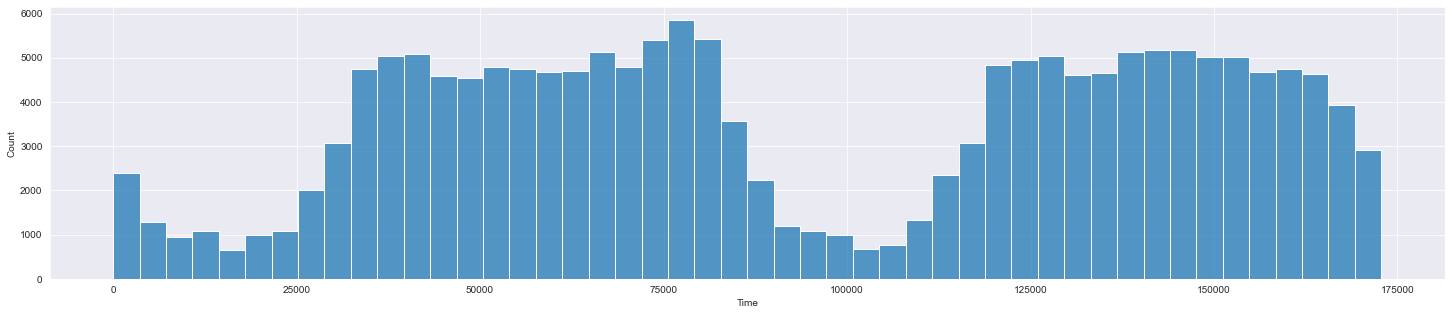

In [404]:
f, ax = plt.subplots(figsize=(25, 5))
sns.histplot(raw_train['Time'], bins = 48)

### Observations:
There are two periods when there si much more transactions done.
$Time$ is in seconds from 0 to 172792 (so it is 2879,8 min -> about 48hours)
We can assume that the modes are daytimes. 

In [405]:

m = 172792/60 #minutes
h = m/60

print(f'Minutes {m}')

print(f'Hours: {h}')


Minutes 2879.866666666667
Hours: 47.99777777777778


<AxesSubplot:xlabel='Time', ylabel='Count'>

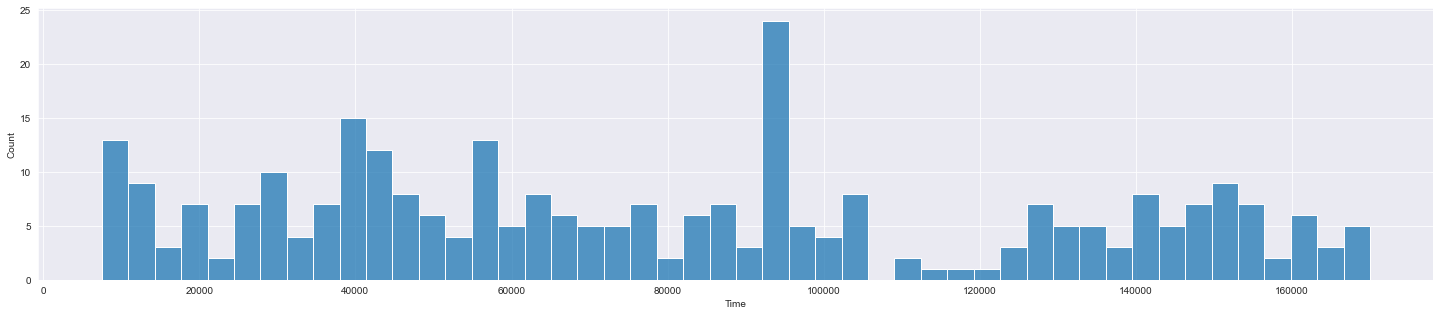

In [406]:
f, ax = plt.subplots(figsize=(25, 5))
sns.histplot(df_fraud['Time'], bins = 48)


# ----- DATA PRE-PROCESSING-----

not needed for POC as we run with random forest and we have all numerical values. Further analysis of 'Time' is needed.

In [407]:
# calculate the hour for each value in 'Time'
# // - Floor Division	9//2 = 4

train_t = raw_train
train_t['hour'] = ((((train_t['Time']) // (60 * 60)) % 24) + 1) # I calculate floor to get hours. As a result I get values from 0 to 47. Next I calulate modulo 24 -> I got values from 0 to 23. Last step adding 1 to get values from 1 to 24.
train_t['hour'] = train_t['hour'].astype(int)
print(train_t['hour'].min(), train_t['hour'].max())

1 24


<AxesSubplot:xlabel='Time', ylabel='hour'>

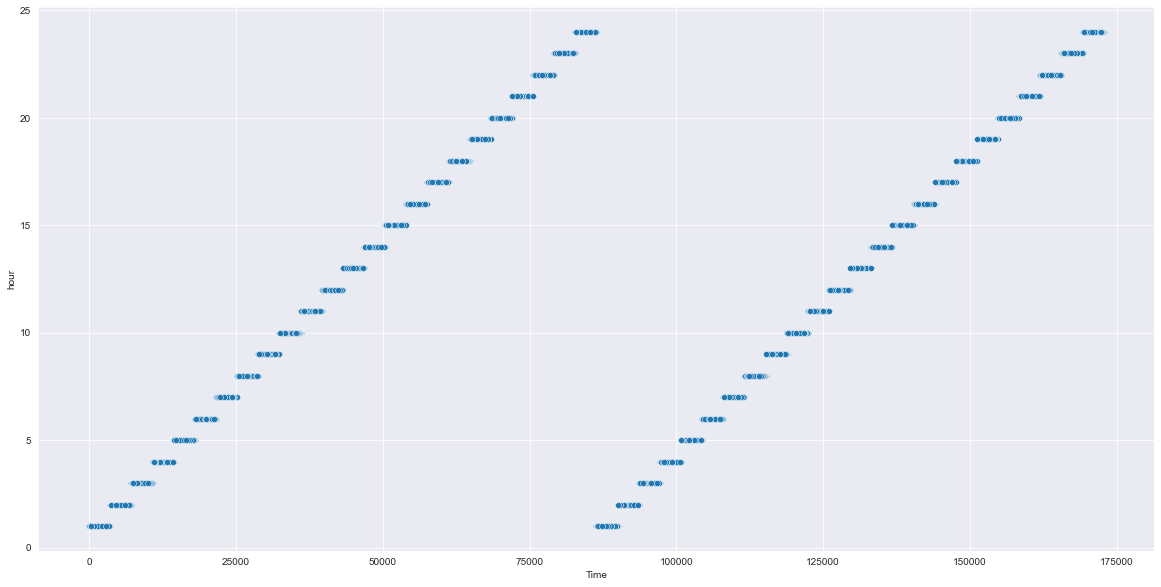

In [408]:
f, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x=train_t['Time'], y=train_t['hour'], data=train_t)

# ------------------POC----------------------------------------- 


In [409]:
# Splitint training data for POC purposes (only about 2 mln instances)

raw_train.shape

(170884, 32)

In [410]:
raw_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
109011,71174.000,-2.108,1.173,1.614,0.483,0.067,-0.191,0.191,-1.706,-0.178,...,-0.389,0.260,0.341,0.400,-0.413,-0.348,0.215,19.990,0,20
280683,169683.000,2.314,-1.311,-1.421,-1.724,-1.003,-0.913,-0.899,-0.222,-1.658,...,0.665,0.029,-0.348,0.069,0.074,-0.024,-0.076,15.000,0,24
158318,111127.000,2.105,0.155,-1.403,0.311,0.504,-0.691,0.139,-0.418,1.895,...,0.760,-0.022,0.465,0.403,-0.479,-0.017,-0.054,1.000,0,7
243733,152052.000,2.072,-0.016,-1.311,0.373,-0.063,-1.381,0.244,-0.394,0.631,...,0.858,0.003,0.077,0.259,-0.110,-0.021,-0.059,1.990,0,19
177016,123008.000,2.046,0.156,-2.007,0.385,0.604,-0.757,0.232,-0.231,0.072,...,1.166,-0.109,0.794,0.377,0.838,-0.075,-0.053,1.570,0,11


In [411]:
drop_list = ['Class', 'hour']

X_train_poc = raw_train.drop(drop_list, axis=1)
X_train_poc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
109011,71174.000,-2.108,1.173,1.614,0.483,0.067,-0.191,0.191,-1.706,-0.178,...,-0.809,1.521,-0.389,0.260,0.341,0.400,-0.413,-0.348,0.215,19.990
280683,169683.000,2.314,-1.311,-1.421,-1.724,-1.003,-0.913,-0.899,-0.222,-1.658,...,-0.487,0.089,0.665,0.029,-0.348,0.069,0.074,-0.024,-0.076,15.000
158318,111127.000,2.105,0.155,-1.403,0.311,0.504,-0.691,0.139,-0.418,1.895,...,-0.193,0.108,0.760,-0.022,0.465,0.403,-0.479,-0.017,-0.054,1.000
243733,152052.000,2.072,-0.016,-1.311,0.373,-0.063,-1.381,0.244,-0.394,0.631,...,-0.260,0.243,0.858,0.003,0.077,0.259,-0.110,-0.021,-0.059,1.990
177016,123008.000,2.046,0.156,-2.007,0.385,0.604,-0.757,0.232,-0.231,0.072,...,-0.112,0.327,1.166,-0.109,0.794,0.377,0.838,-0.075,-0.053,1.570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,2937.000,-0.415,0.713,1.222,-2.108,0.187,-1.282,1.119,-0.345,0.463,...,0.075,0.133,0.757,-0.291,0.559,0.037,-0.872,0.239,-0.020,1.000
233802,147710.000,1.994,-0.517,-0.620,0.130,-0.285,0.395,-0.822,0.232,0.996,...,-0.174,0.263,0.885,0.099,0.276,-0.195,0.624,-0.032,-0.059,5.990
85418,60764.000,-1.498,0.658,1.582,-0.024,0.585,1.303,0.609,0.136,0.453,...,-0.225,-0.072,0.299,0.110,-0.616,-0.426,0.264,-0.448,0.045,36.990
29062,35301.000,1.070,0.072,0.497,1.505,-0.380,-0.370,0.101,-0.027,0.320,...,-0.149,-0.062,-0.045,-0.050,0.400,0.593,-0.335,0.031,0.025,45.420


In [412]:
print("X_train_poc set dimensions: ", X_train_poc.shape)
print("y_train set dimensions: ", y_train.shape)

X_train_poc set dimensions:  (170884, 30)
y_train set dimensions:  (170884,)


# ------------------------ Training ---------------------

In [413]:
from sklearn.ensemble import RandomForestClassifier

In [415]:
clf = RandomForestClassifier()
clf.fit(X_train_poc, y_train)

RandomForestClassifier()

In [416]:
# to show floats with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

feature_importances = pd.DataFrame({'feature': X_train_poc.columns, 'importance': clf.feature_importances_})
feature_importances.sort_values('importance', ascending=False, inplace=True)
print(feature_importances)

   feature  importance
17     V17       0.174
12     V12       0.116
14     V14       0.109
10     V10       0.099
16     V16       0.066
11     V11       0.064
9       V9       0.041
18     V18       0.034
4       V4       0.027
7       V7       0.024
3       V3       0.024
21     V21       0.020
26     V26       0.017
1       V1       0.015
6       V6       0.014
5       V5       0.014
8       V8       0.013
29  Amount       0.012
2       V2       0.011
13     V13       0.011
15     V15       0.011
19     V19       0.011
0     Time       0.011
20     V20       0.011
22     V22       0.010
27     V27       0.010
25     V25       0.008
24     V24       0.008
28     V28       0.008
23     V23       0.007


# ---------Testing and performance analysis---------

### Data preparation

In [417]:
raw_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148361,89763.000,0.288,0.465,1.052,-0.668,0.413,-0.030,0.520,-0.147,0.628,...,-0.166,-0.200,0.093,0.575,-0.622,-0.750,-0.082,-0.195,2.490,0
249261,154320.000,1.748,-0.820,-0.086,0.276,-1.067,-0.492,-0.590,-0.087,1.426,...,0.116,0.300,0.168,0.015,-0.466,-0.109,0.014,-0.009,128.870,0
87264,61606.000,0.887,-0.374,2.307,3.179,-1.717,0.528,-1.108,0.396,1.034,...,0.156,0.672,-0.087,0.950,0.319,0.192,0.070,0.056,72.000,0
188431,127974.000,-2.023,2.214,-2.098,-1.042,-0.121,-0.028,-0.595,1.821,-0.392,...,-0.202,-0.811,0.165,-0.360,-0.104,0.173,0.061,-0.003,9.990,0
18438,29499.000,1.043,0.011,1.589,2.954,-0.893,0.640,-0.746,0.378,0.590,...,0.059,0.513,-0.048,0.415,0.465,0.226,0.059,0.025,1.520,0


In [418]:
raw_test.shape

(56962, 31)

In [419]:
X_test_poc = raw_test.drop(columns = ['Class'], axis=1) #droppig the same columns as in case of training set
y_test_poc = raw_test['Class'] #getting labels

print(X_test_poc.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


### Predictions

In [451]:
y_pred =clf.predict(X_test_poc)


### Performance analysis

In [421]:
print(metrics.classification_report(y_test_poc, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56863
           1     0.9647    0.8283    0.8913        99

    accuracy                         0.9996     56962
   macro avg     0.9822    0.9141    0.9456     56962
weighted avg     0.9996    0.9996    0.9996     56962



In [452]:
balanced_accuracy_score(y_test_poc, y_pred)

0.9141150349493209

In [422]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred)

### ROC curve

**<code style="background:yellow;color:blue"> FROM THE BOOK </code>**

The roc_curve() function expects labels and scores, but instead of scores you can
give it class probabilities. Let’s use the positive class’s probability as the score:

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class 

In [423]:
y_prob = clf.predict_proba(X_test_poc)[:,1]

In [424]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob)

In [425]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)

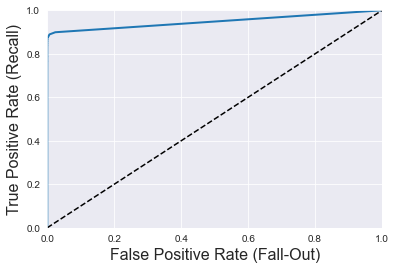

In [426]:
plot_roc_curve(fpr,tpr)
plt.show()

In [427]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_poc, y_prob)

0.9480734041432562

In [428]:
#metrics.ConfusionMatrixDisplay.from_predictions(y_test_poc, y_pred)
#plt.show()

In [429]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test_poc, y_pred)

array([[56860,     3],
       [   17,    82]], dtype=int64)

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
  Not bad but still can be better. Especially if it goes to recall on Frauds. 

# -------------------- With hour instead of Time -------------------

In [430]:
drop_list1 = ['Class', 'Time']
X_train_poc1 = train_t.drop(drop_list1, axis=1)
X_train_poc1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hour
109011,-2.108,1.173,1.614,0.483,0.067,-0.191,0.191,-1.706,-0.178,0.023,...,1.521,-0.389,0.260,0.341,0.400,-0.413,-0.348,0.215,19.990,20
280683,2.314,-1.311,-1.421,-1.724,-1.003,-0.913,-0.899,-0.222,-1.658,1.890,...,0.089,0.665,0.029,-0.348,0.069,0.074,-0.024,-0.076,15.000,24
158318,2.105,0.155,-1.403,0.311,0.504,-0.691,0.139,-0.418,1.895,-0.501,...,0.108,0.760,-0.022,0.465,0.403,-0.479,-0.017,-0.054,1.000,7
243733,2.072,-0.016,-1.311,0.373,-0.063,-1.381,0.244,-0.394,0.631,0.022,...,0.243,0.858,0.003,0.077,0.259,-0.110,-0.021,-0.059,1.990,19
177016,2.046,0.156,-2.007,0.385,0.604,-0.757,0.232,-0.231,0.072,-0.192,...,0.327,1.166,-0.109,0.794,0.377,0.838,-0.075,-0.053,1.570,11


In [431]:
# one-hot-encoded dataset
X_train_poc1 = pd.get_dummies(X_train_poc1, columns = ['hour'], prefix='hour')
X_train_poc1.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
109011,-2.108,1.173,1.614,0.483,0.067,-0.191,0.191,-1.706,-0.178,0.023,...,0,0,0,0,0,1,0,0,0,0
280683,2.314,-1.311,-1.421,-1.724,-1.003,-0.913,-0.899,-0.222,-1.658,1.890,...,0,0,0,0,0,0,0,0,0,1
158318,2.105,0.155,-1.403,0.311,0.504,-0.691,0.139,-0.418,1.895,-0.501,...,0,0,0,0,0,0,0,0,0,0
243733,2.072,-0.016,-1.311,0.373,-0.063,-1.381,0.244,-0.394,0.631,0.022,...,0,0,0,0,1,0,0,0,0,0
177016,2.046,0.156,-2.007,0.385,0.604,-0.757,0.232,-0.231,0.072,-0.192,...,0,0,0,0,0,0,0,0,0,0
76252,1.210,0.005,0.665,0.847,-0.684,-0.654,-0.132,-0.075,0.590,-0.200,...,0,1,0,0,0,0,0,0,0,0
120209,-0.797,-0.556,1.468,-2.465,0.185,-1.288,-0.120,-0.187,-2.779,0.706,...,0,0,0,0,0,0,0,1,0,0
195576,-0.360,0.503,-1.280,-0.112,-0.167,-0.597,1.216,0.266,-0.398,-1.166,...,0,0,0,0,0,0,0,0,0,0
193050,-2.246,-1.757,1.385,-0.281,1.430,1.214,0.020,0.663,-0.159,-1.038,...,0,0,0,0,0,0,0,0,0,0
144159,-2.749,2.126,0.935,-0.069,-1.526,-0.426,-0.644,1.423,-0.184,-0.162,...,0,0,0,0,0,0,0,0,0,1


In [432]:
clf_s1 = RandomForestClassifier()
clf_s1.fit(X_train_poc1, y_train)

RandomForestClassifier()

In [433]:
# to show floats with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

feature_importances = pd.DataFrame({'feature': X_train_poc1.columns, 'importance': clf_s1.feature_importances_})
feature_importances.sort_values('importance', ascending=False, inplace=True)
print(feature_importances)

    feature  importance
16      V17       0.177
11      V12       0.138
13      V14       0.115
15      V16       0.081
9       V10       0.055
10      V11       0.048
8        V9       0.041
3        V4       0.034
17      V18       0.031
6        V7       0.025
1        V2       0.020
2        V3       0.019
25      V26       0.016
20      V21       0.015
4        V5       0.015
7        V8       0.014
19      V20       0.014
18      V19       0.014
26      V27       0.013
14      V15       0.012
0        V1       0.012
5        V6       0.011
28   Amount       0.010
21      V22       0.010
27      V28       0.009
12      V13       0.009
24      V25       0.009
23      V24       0.008
22      V23       0.007
35   hour_7       0.003
37   hour_9       0.002
29   hour_1       0.001
30   hour_2       0.001
46  hour_18       0.001
33   hour_5       0.001
31   hour_3       0.001
50  hour_22       0.001
51  hour_23       0.001
40  hour_12       0.001
42  hour_14       0.001
41  hour_13     

In [434]:
## Test dataset prepareation
raw_test['hour'] = ((((raw_test['Time']) // (60 * 60)) % 24) + 1) # I calculate floor to get hours. As a result I get values from 0 to 47. Next I calulate modulo 24 -> I got values from 0 to 23. Last step adding 1 to get values from 1 to 24.
raw_test['hour'] = raw_test['hour'].astype(int)
print(raw_test['hour'].min(), raw_test['hour'].max())

X_test_poc1 = raw_test.drop(drop_list1, axis=1)
y_test = raw_test['Class']

1 24


In [435]:
# one-hot-encoded dataset
X_test_poc1 = pd.get_dummies(X_test_poc1, columns = ['hour'], prefix='hour')
X_test_poc1.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
148361,0.288,0.465,1.052,-0.668,0.413,-0.030,0.520,-0.147,0.628,-0.643,...,0,0,0,0,0,0,0,0,0,0
249261,1.748,-0.820,-0.086,0.276,-1.067,-0.492,-0.590,-0.087,1.426,-0.306,...,0,0,0,0,1,0,0,0,0,0
87264,0.887,-0.374,2.307,3.179,-1.717,0.528,-1.108,0.396,1.034,0.286,...,0,0,0,1,0,0,0,0,0,0
188431,-2.023,2.214,-2.098,-1.042,-0.121,-0.028,-0.595,1.821,-0.392,-0.234,...,0,0,0,0,0,0,0,0,0,0
18438,1.043,0.011,1.589,2.954,-0.893,0.640,-0.746,0.378,0.590,0.369,...,0,0,0,0,0,0,0,0,0,0
268828,-1.651,-1.022,1.644,0.725,2.470,-1.680,-0.162,-0.124,-0.053,-0.346,...,0,0,0,0,0,0,0,1,0,0
262259,1.919,0.165,-2.046,1.482,0.542,-1.052,0.533,-0.279,0.422,-0.239,...,0,0,0,0,0,0,1,0,0,0
184180,0.175,0.381,0.452,-0.443,0.382,-0.678,1.174,-0.415,0.342,-0.485,...,0,0,0,0,0,0,0,0,0,0
13551,-1.557,0.799,0.856,-0.017,0.541,-1.222,0.517,0.126,0.610,-1.034,...,0,0,0,0,0,0,0,0,0,0
78757,1.486,-0.388,0.188,-0.907,-0.576,-0.475,-0.527,-0.171,-0.816,0.593,...,0,0,1,0,0,0,0,0,0,0


In [436]:
y_pred1 =clf_s1.predict(X_test_poc1)

In [437]:
print(metrics.classification_report(y_test, y_pred1, digits=4))

              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998     56863
           1     0.9762    0.8283    0.8962        99

    accuracy                         0.9997     56962
   macro avg     0.9879    0.9141    0.9480     56962
weighted avg     0.9997    0.9997    0.9997     56962



In [449]:
balanced_accuracy_score(y_test, y_pred1)

0.9141238280133519

In [438]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred1)

# ---------------- ROC curve--------------------------

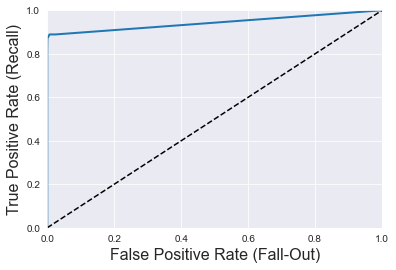

In [439]:
y_prob1 = clf_s1.predict_proba(X_test_poc1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob1)

plot_roc_curve(fpr,tpr)
plt.show()

In [440]:
roc_auc_score(y_test, y_prob1)

0.9430509658425877

In [441]:
confusion_matrix(y_test, y_pred1)

array([[56861,     2],
       [   17,    82]], dtype=int64)

### Observation:

- it is not better.

NEXT STEPS:
- check the result after removing the 'time' column
- deside which feature shouls stay. Maybe it would be good to run lasso and compare the feature importance from RF and lasso. Based on that maybe it will be possible to deside which features are more important. 


# --------------- Balanced Random Forest --------------

In [442]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train_poc, y_train)

BalancedRandomForestClassifier(random_state=0)

In [443]:
y_pred = brf.predict(X_test_poc)
balanced_accuracy_score(y_test_poc, y_pred)

0.9376682783731304

In [444]:
print(metrics.classification_report(y_test_poc, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9763    0.9879     56863
           1     0.0621    0.8990    0.1161        99

    accuracy                         0.9762     56962
   macro avg     0.5309    0.9377    0.5520     56962
weighted avg     0.9982    0.9762    0.9864     56962



In [445]:
precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred)

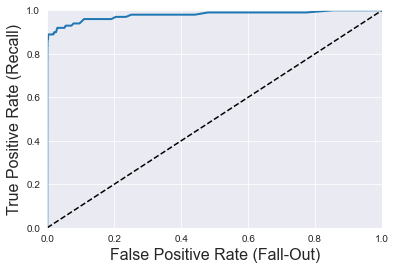

In [446]:
y_prob = brf.predict_proba(X_test_poc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob)

plot_roc_curve(fpr,tpr)
plt.show()

In [447]:
roc_auc_score(y_test_poc, y_prob)

0.9783640886291117

In [448]:
confusion_matrix(y_test_poc, y_pred)

array([[55518,  1345],
       [   10,    89]], dtype=int64)

### -> just to check how the feature importance looks for this model

In [456]:
# to show floats with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

feature_importances = pd.DataFrame({'feature': X_train_poc.columns, 'importance': brf.feature_importances_})
feature_importances.sort_values('importance', ascending=False, inplace=True)
print(feature_importances)

   feature  importance
14     V14       0.178
10     V10       0.131
4       V4       0.101
12     V12       0.084
11     V11       0.084
3       V3       0.063
17     V17       0.053
7       V7       0.040
16     V16       0.037
9       V9       0.024
2       V2       0.023
21     V21       0.018
6       V6       0.014
1       V1       0.014
5       V5       0.013
29  Amount       0.012
20     V20       0.012
19     V19       0.011
18     V18       0.010
8       V8       0.009
13     V13       0.009
27     V27       0.008
26     V26       0.008
15     V15       0.007
28     V28       0.007
0     Time       0.006
25     V25       0.006
23     V23       0.005
24     V24       0.005
22     V22       0.005
